# Preprocessing
melakukan preprocess data terutama untuk attribut `content` setelah dilakukannya proses EDA. dilakukannya tahapan ini bertujuan untuk membersihkan data sehingga data siap digunakan untuk di proses berikutnya.

In [1]:
# Library yang digunakan pada tahapan preprocessing
import pandas as pd, re, os, string
import nlp_id, Sastrawi as sastra

#### Membaca Data hasil dari proses sebelumnya

In [2]:
data = pd.read_csv('../out/00-result-eda.tsv', sep='\t')

#### Membuat Function untuk preprocess

In [ ]:
class StopWord(nlp_id.StopWord):
    def __init__(self, stopword_path=None):
        self.current_dir = os.path.dirname(os.path.realpath(__name__))
        if not stopword_path:
            stopword_path = os.path.join(self.current_dir, "data", "stopwords.txt")
        super(StopWord, self).__init__()
        with open(stopword_path) as f:
            additional = f.read().split('\n')
            self.stopwords = set(self.stopwords).union(set(additional))

In [ ]:
stopwords = StopWord()
lemmatizer = nlp_id.Lemmatizer()
tokenizer = nlp_id.Tokenizer()

In [ ]:
number_to_letter = {"1": "i", "3": "e", "4": "a", "5": "s", "9": "g", "0": "o"}

def remove_mentions(content: str):
    return re.sub(r"(\@\w+)", "", content, flags=re.MULTILINE).strip()


def remove_links(content: str):
    return re.sub(r"http\S+", "", content, flags=re.MULTILINE).strip()


def replace_strip_as_ws(content: str):
    return re.sub(r"([a-zA-Z]|\s)([-])(\s|[a-zA-Z])", r"\1 \3", content, flags=re.MULTILINE).strip()


def replace_numbers_with_letters(input_str: str):
    pattern = r"[a-zA-Z](\d+)[a-zA-Z]"
    matches = re.finditer(pattern, input_str)
    replaced_str = input_str
    for match in matches:
        number = match.group(1)
        if number in number_to_letter:
            replaced_str = replaced_str.replace(number, number_to_letter[number])
    return replaced_str


def preprocess(content: str):
    text = remove_links(content)
    text = remove_mentions(text)
    text = replace_strip_as_ws(text)
    text = stopwords.remove_stopword(text)
    text = replace_numbers_with_letters(text)
    text = lemmatizer.lemmatize(text)
    token = tokenizer.tokenize(text)
    return token

### Mengecek frequensi kata yang muncul menggunakan wordcloud

In [ ]:
freqs = {}
for x in df['content'].apply(lambda x: preprocess(x)):
  for word in x:
    count = freqs.get(word, 0)
    freqs[word] = count + 1

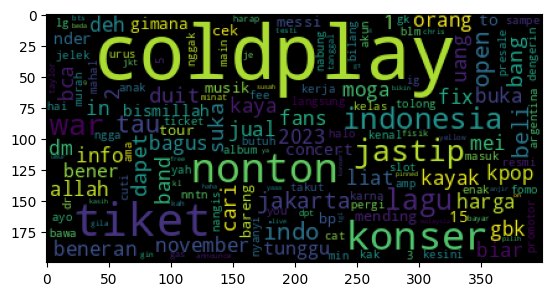

In [ ]:
from wordcloud import WordCloud
plt.imshow(WordCloud().generate_from_frequencies(freqs))

### Mengimplementasikan text-preprocessing pada data

In [ ]:
data_output = df[['content', 'username', 'mentioned']].copy(deep=True)
data_output['rawContent'] = data_output['content']
data_output['content'] = data_output['content'].apply(lambda x: " ".join(preprocess(x)))

In [ ]:
data_output.to_csv('./data/tsv/data.tsv', sep="\t", index=False)